In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
from google.colab import files

In [3]:
uploaded = files.upload()

Saving sports_survey_clean.csv to sports_survey_clean.csv


In [4]:
df = pd.read_csv('sports_survey_clean.csv')

In [5]:
#doing the same train/test as Rudy and Ryan's, w/ random state 555
fan_train, fan_test = train_test_split(df,
                                      shuffle = True,
                                      random_state = 555,
                                      test_size = .2)

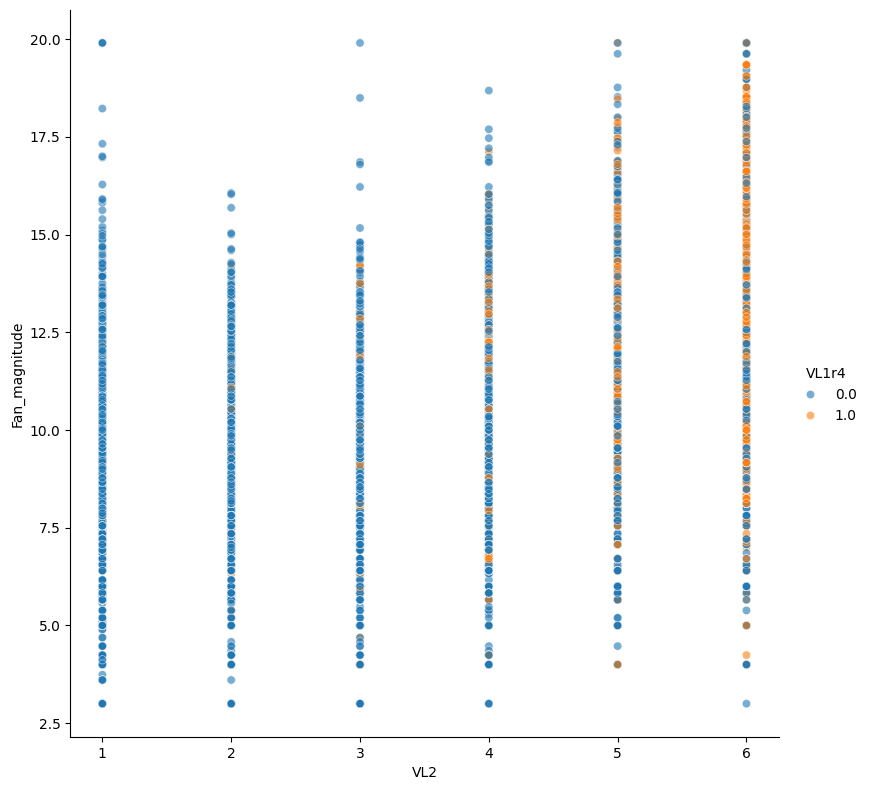

In [6]:
sns.pairplot(fan_train,
             x_vars = 'VL2',
             y_vars = 'Fan_magnitude',
             hue = 'VL1r4',
             plot_kws = {'alpha' : .6},
             height = 8,
             aspect = 1)

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [8]:
#Further splitting the training data into training and validation
#The first model I'm building is to classify our data with respect to VL1r4 (placed a bet at a casino etc.), based on VL2 (interest in betting) and Fan_magnitude
#We have since decided to drop VL2 as an input variable
x_vl2_fan_mag, x_val_vl2_fan_mag, y_vl1r4, y_val_vl1r4 = train_test_split(fan_train[['VL2', 'Fan_magnitude']],fan_train[['VL1r4']],
                                                                          test_size=0.2,
                                                                          random_state=555,
                                                                          stratify=fan_train[['VL1r4']])

In [9]:
model_vl2_fan_mag_vl1r4 = Sequential([
    Dense(10, activation='relu', input_shape=(2,)),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')])

In [10]:
model_vl2_fan_mag_vl1r4.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [11]:
history_vl2_fan_mag_vl1r4 = model_vl2_fan_mag_vl1r4.fit(x_vl2_fan_mag, y_vl1r4,
                    epochs=50,
                    batch_size=32,
                    validation_data=(x_val_vl2_fan_mag, y_val_vl1r4))

Epoch 1/50
208/208 [==============================] - 2s 4ms/step - loss: 0.5126 - accuracy: 0.7948 - val_loss: 0.4794 - val_accuracy: 0.7949
Epoch 2/50
208/208 [==============================] - 1s 4ms/step - loss: 0.4690 - accuracy: 0.7948 - val_loss: 0.4355 - val_accuracy: 0.7949
Epoch 3/50
208/208 [==============================] - 1s 3ms/step - loss: 0.4338 - accuracy: 0.7954 - val_loss: 0.4074 - val_accuracy: 0.7949
Epoch 4/50
208/208 [==============================] - 1s 3ms/step - loss: 0.4141 - accuracy: 0.7978 - val_loss: 0.3894 - val_accuracy: 0.7937
Epoch 5/50
208/208 [==============================] - 1s 2ms/step - loss: 0.3996 - accuracy: 0.8077 - val_loss: 0.3778 - val_accuracy: 0.8142
Epoch 6/50
208/208 [==============================] - 1s 3ms/step - loss: 0.3886 - accuracy: 0.8101 - val_loss: 0.3668 - val_accuracy: 0.8227
Epoch 7/50
208/208 [==============================] - 1s 4ms/step - loss: 0.3827 - accuracy: 0.8106 - val_loss: 0.3645 - val_accuracy: 0.8233
Epoch 

In [12]:
#compiling a similar model with input variables D4 (income), S2 (age) and Fan_magnitude, which we have also decided are the best
#performing features and output VL1r12 (purchased multi-game tickets)
x_D4_S2_fan_mag, x_val_D4_S2_fan_mag, y_vl1r12, y_val_vl1r12 = train_test_split(fan_train[['D4', 'Fan_magnitude', 'S2']],fan_train[['VL1r12']],
                                                                          test_size=0.2,
                                                                          random_state=555,
                                                                          stratify=fan_train[['VL1r12']])

In [13]:
model_D4_S2_fan_mag_vl1r12 = Sequential([
    Dense(10, activation='relu', input_shape=(3,)),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')])

In [14]:
model_D4_S2_fan_mag_vl1r12.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [15]:
history_D4_S2_fan_mag_vl1r12 = model_D4_S2_fan_mag_vl1r12.fit(x_D4_S2_fan_mag, y_vl1r12,
                    epochs=50,
                    batch_size=32,
                    validation_data=(x_val_D4_S2_fan_mag, y_val_vl1r12))

Epoch 1/50
208/208 [==============================] - 2s 3ms/step - loss: 4.1333 - accuracy: 0.4743 - val_loss: 0.3427 - val_accuracy: 0.9192
Epoch 2/50
208/208 [==============================] - 1s 2ms/step - loss: 0.3055 - accuracy: 0.9190 - val_loss: 0.2869 - val_accuracy: 0.9192
Epoch 3/50
208/208 [==============================] - 0s 2ms/step - loss: 0.2765 - accuracy: 0.9190 - val_loss: 0.2777 - val_accuracy: 0.9192
Epoch 4/50
208/208 [==============================] - 0s 2ms/step - loss: 0.2716 - accuracy: 0.9190 - val_loss: 0.2744 - val_accuracy: 0.9192
Epoch 5/50
208/208 [==============================] - 1s 3ms/step - loss: 0.2694 - accuracy: 0.9190 - val_loss: 0.2733 - val_accuracy: 0.9192
Epoch 6/50
208/208 [==============================] - 0s 2ms/step - loss: 0.2675 - accuracy: 0.9190 - val_loss: 0.2725 - val_accuracy: 0.9192
Epoch 7/50
208/208 [==============================] - 0s 2ms/step - loss: 0.2673 - accuracy: 0.9190 - val_loss: 0.2705 - val_accuracy: 0.9192
Epoch 

In [16]:
#our 'final' input and output variables at the moment...
best_features = ['D4', 'S2', 'Fan_magnitude']
VL1s = ['VL1r1','VL1r2','VL1r4','VL1r5',
       'VL1r7','VL1r10','VL1r11','VL1r12',
       'VL1r13','VL1r14']

In [17]:
fan_train[best_features]

,D4,S2,Fan_magnitude
1906,3,62,11.747340
2164,2,66,10.440307
8795,4,47,13.000000
2434,5,49,4.000000
2024,4,74,8.185353
...,...,...,...
9622,5,61,13.266499
6694,2,51,11.045361
7549,2,59,7.681146
9249,6,37,10.344080


In [18]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [19]:
#building a two layered ReLU NN with 10 nodes in both layers (why does 10 for both work well? I'm unsure...)
def create_model(input_dim):
    model = Sequential([
        Dense(10, activation='relu', input_shape=(input_dim,)),
        Dense(10, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [20]:
# Now incorporating stratified k-fold validation into the NN
# Number of folds = k = 5, consistent with Rudy and Ryan's work
k = 5
epochs = 50
batch_size = 10

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()

accuracies = []

#doing a first run on D4, S2, Fan_mag and VL1r12

X = fan_train[best_features]

for train_index, val_index in skf.split(X, fan_train[['VL1r12']]):
    # Split data
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = fan_train[['VL1r12']].iloc[train_index], fan_train[['VL1r12']].iloc[val_index]

    # Standardize the data
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)

    # Create the model
    model = create_model(X_train.shape[1])

    # Train the model
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

    # Evaluate the model
    y_val_pred = (model.predict(X_val) > 0.5).astype("int32")
    accuracy = accuracy_score(y_val, y_val_pred)
    accuracies.append(accuracy)

print(f'Average cross-validation accuracy: {np.mean(accuracies)}')

52/52 [==============================] - 0s 2ms/step
Average cross-validation accuracy: 0.9194114525284043


In [21]:
#iterating over the list VL1s to generate and test models for each VL1, with inputs remaining the same: D4, S2, Fan_magnitude
for i, v in enumerate(VL1s):

    y = fan_train[v]

    for train_index, val_index in skf.split(X, y):
    # Split data
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Standardize the data
        X_train = scaler.fit_transform(X_train)
        X_val = scaler.transform(X_val)

        # Create the model
        model = create_model(X_train.shape[1])

        # Train the model
        model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

        # Evaluate the model
        y_val_pred = (model.predict(X_val) > 0.5).astype("int32")
        accuracy = accuracy_score(y_val, y_val_pred)
        accuracies.append(accuracy)

    print(f'Average cross-validation accuracy for {v}: {np.mean(accuracies)}')


52/52 [==============================] - 0s 1ms/step
Average cross-validation accuracy for VL1r1: 0.788093099203365
52/52 [==============================] - 0s 1ms/step
Average cross-validation accuracy for VL1r2: 0.7398964415807097
52/52 [==============================] - 0s 1ms/step
Average cross-validation accuracy for VL1r4: 0.7549164526994809
52/52 [==============================] - 0s 2ms/step
Average cross-validation accuracy for VL1r5: 0.734346752782544
52/52 [==============================] - 0s 1ms/step
Average cross-validation accuracy for VL1r7: 0.7123900043654887
52/52 [==============================] - 0s 1ms/step
Average cross-validation accuracy for VL1r10: 0.7146129127432994
52/52 [==============================] - 0s 1ms/step
Average cross-validation accuracy for VL1r11: 0.7214075989351022
52/52 [==============================] - 0s 1ms/step
Average cross-validation accuracy for VL1r12: 0.7433275846714319
52/52 [==============================] - 0s 2ms/step
Average cr

In [22]:
for train_index, val_index in skf.split(X, fan_train[['VL1r12']]):
    # Split data
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = fan_train[['VL1r12']].iloc[train_index], fan_train[['VL1r12']].iloc[val_index]

    # Standardize the data
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)

    # Create the model
    model = create_model(X_train.shape[1])

    # Train the model
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

    # Evaluate the model
    y_val_pred = (model.predict(X_val) > 0.5).astype("int32")
    accuracy = accuracy_score(y_val, y_val_pred)
    accuracies.append(accuracy)

print(f'Average cross-validation accuracy: {np.mean(accuracies)}')

52/52 [==============================] - 0s 1ms/step
Average cross-validation accuracy: 0.769724783721459
